In [1]:
import sys

sys.path.append(".../src")
%load_ext autoreload
%autoreload 2

In [2]:
from src.downsampled import downsample_grey , downsample_RGB
from src.interpolation import conv_interpolate,color_image_intepolate, grey_image_interpolate
from src.kernels import sample_hold_kernel, nearest_neighbour_kernel, linear_kernel
from src.mse import calculate_mse

import numpy as np
from numpy.typing import NDArray
from skimage import io, transform, color
from matplotlib import pyplot as plt



(-0.5, 999.5, 599.5, -0.5)

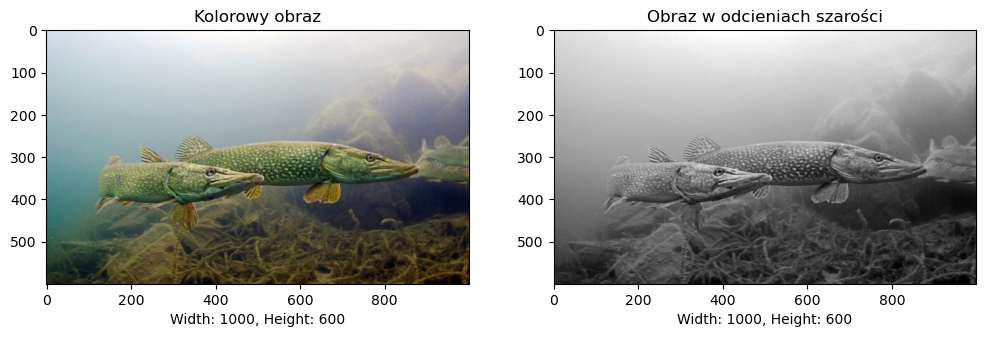

In [3]:
color_img=io.imread('szczupak.jpg')
color_img=transform.resize(color_img, output_shape=(600,1000,3))

grey_img = color.rgb2gray(color_img)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(color_img)
plt.title("Kolorowy obraz")
plt.xlabel(f"Width: {color_img.shape[1]}, Height: {color_img.shape[0]}")
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(grey_img, cmap='gray')
plt.title("Obraz w odcieniach szarości")
plt.xlabel(f"Width: {grey_img.shape[1]}, Height: {grey_img.shape[0]}")
plt.axis('on')

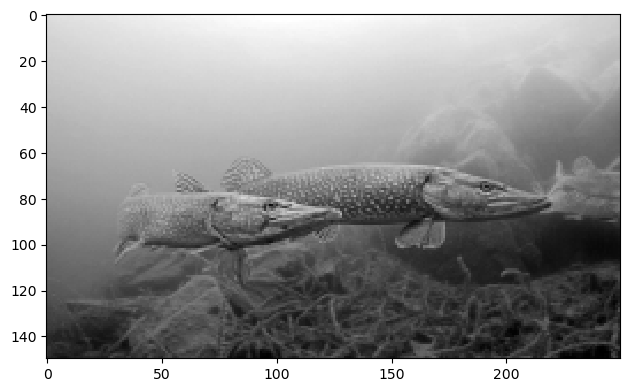

In [4]:
downsampled_grey_img = downsample_grey(grey_img, kernel_size=4, step = 4)
img=io.imshow(downsampled_grey_img)


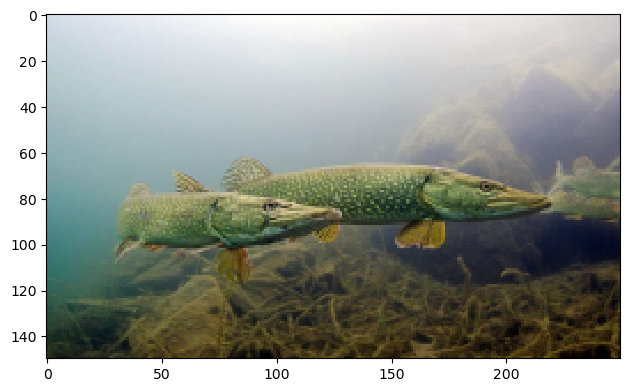

In [5]:
downsampled_color_img = downsample_RGB(color_img, kernel_size=4, step= 4)
img=io.imshow(downsampled_color_img)

In [6]:
downsampled_grey_img.shape

(150, 250)

In [7]:
grey_img_upsampled_sample_hold_kernel = grey_image_interpolate(downsampled_grey_img, kernel=sample_hold_kernel, ratio=4)
grey_img_upsampled_sample_hold_kernel.shape

(600, 1000)

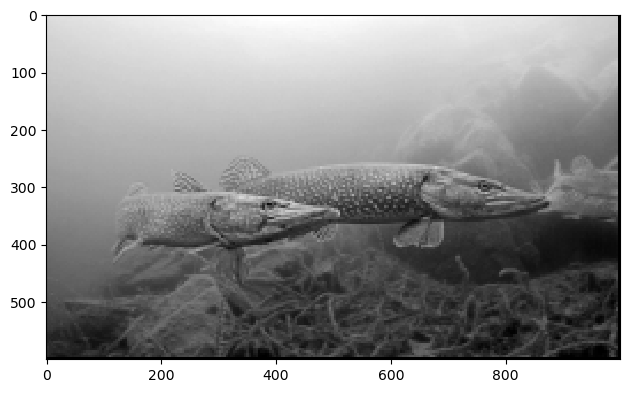

In [8]:
img=io.imshow(grey_img_upsampled_sample_hold_kernel)

In [9]:
grey_img_upsampled_nearest_neighbour_kernel = grey_image_interpolate(downsampled_grey_img, kernel=nearest_neighbour_kernel, ratio=4)
grey_img_upsampled_nearest_neighbour_kernel.shape

(600, 1000)

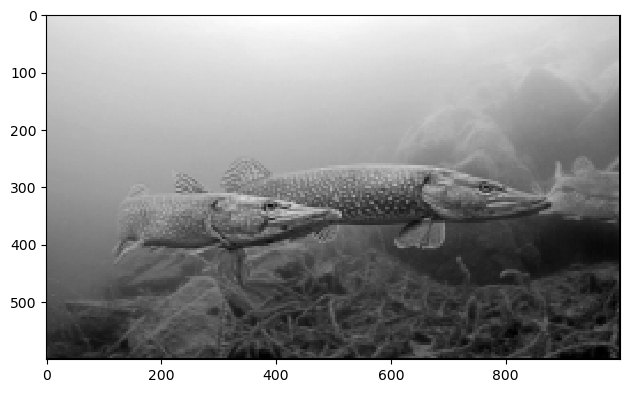

In [10]:
img=io.imshow(grey_img_upsampled_nearest_neighbour_kernel)

In [11]:
grey_img_upsampled_linear_kernel = grey_image_interpolate(downsampled_grey_img, kernel=linear_kernel, ratio=4)
grey_img_upsampled_linear_kernel.shape

(600, 1000)

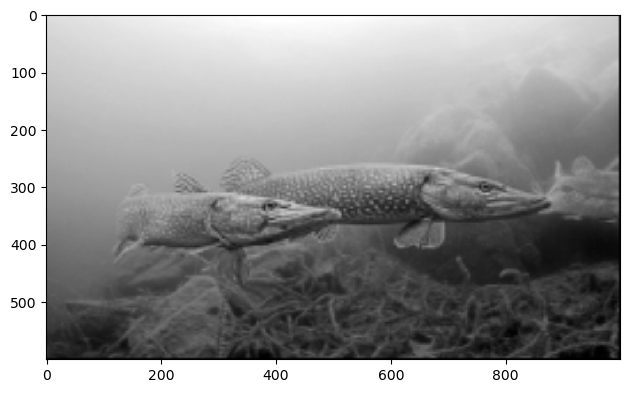

In [12]:
img=io.imshow(grey_img_upsampled_linear_kernel)

In [13]:
mse1=calculate_mse(grey_img_upsampled_linear_kernel, grey_img)
mse2=calculate_mse(grey_img_upsampled_nearest_neighbour_kernel,grey_img)
mse3=calculate_mse(grey_img_upsampled_sample_hold_kernel, grey_img)

print(f"MSE beetween linear kernel interpolation and original image: {mse1:.4}")
print(f"MSE beetween nearest neigbour kernel interpolation and original image: {mse2:.4}")
print(f"MSE beetween sample hold kernel interpolation and original image: {mse3:.4}")


MSE beetween linear kernel interpolation and original image: 0.001426
MSE beetween nearest neigbour kernel interpolation and original image: 0.001381
MSE beetween sample hold kernel interpolation and original image: 0.003504


In [14]:

downsampled_color_img.shape

(150, 250, 3)

In [15]:
color_img_upsampled_sample_hold_kernel = color_image_intepolate(downsampled_color_img, kernel=sample_hold_kernel, ratio=4)
color_img_upsampled_sample_hold_kernel.shape

(600, 1000, 3)

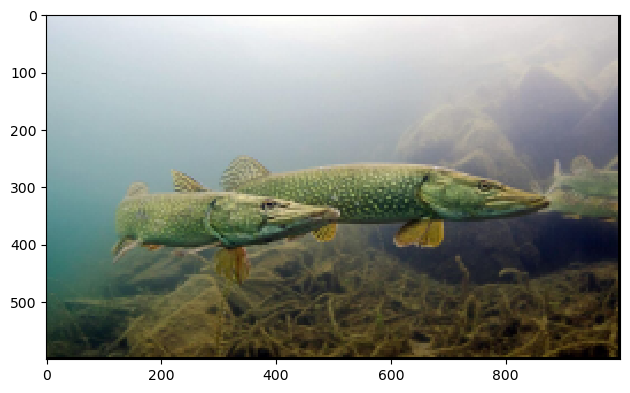

In [16]:
img=io.imshow(color_img_upsampled_sample_hold_kernel)

In [17]:
color_img_upsampled_nearest_neighbour_kernel = color_image_intepolate(downsampled_color_img, kernel=nearest_neighbour_kernel, ratio=4)
color_img_upsampled_nearest_neighbour_kernel.shape

(600, 1000, 3)

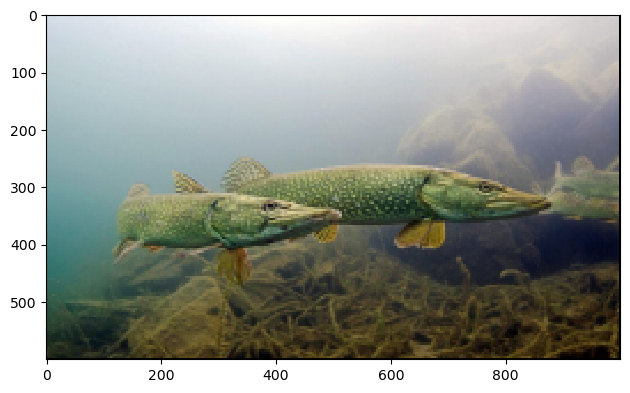

In [18]:
img=io.imshow(color_img_upsampled_nearest_neighbour_kernel)

In [19]:
color_img_upsampled_linear_kernel = color_image_intepolate(downsampled_color_img, kernel=linear_kernel, ratio=4)
color_img_upsampled_linear_kernel.shape

(600, 1000, 3)

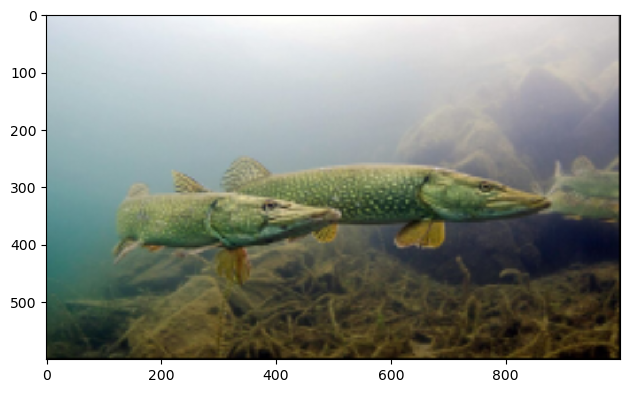

In [20]:
img=io.imshow(color_img_upsampled_linear_kernel)

In [21]:

mse1=calculate_mse(color_img_upsampled_linear_kernel, color_img)
mse2=calculate_mse( color_img_upsampled_nearest_neighbour_kernel, color_img)
mse3=calculate_mse(color_img_upsampled_sample_hold_kernel, color_img)

print(f"MSE beetween linear kernel interpolation and original image: {mse1:.4}")
print(f"MSE beetween nearest neigbour kernel interpolation and original image: {mse2:.4}")
print(f"MSE beetween sample hold kernel interpolation and original image: {mse3:.4}")


MSE beetween linear kernel interpolation and original image: 0.001384
MSE beetween nearest neigbour kernel interpolation and original image: 0.001344
MSE beetween sample hold kernel interpolation and original image: 0.003369
